In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler,label_binarize
from sklearn.metrics import f1_score,recall_score,confusion_matrix,classification_report,accuracy_score,precision_score,roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import peakutils.peak
from scipy import interp
from itertools import cycle
import numpy as np
import pandas as pd
import json
from scipy.fftpack import fft,ifft
import joblib

ModuleNotFoundError: No module named 'pandas'

In [3]:
def fft_freq(data):
    Fs = 500
    L = len (data)                        
    N = int(np.power(2,np.ceil(np.log2(L))))    
    FFT_y1 = np.abs(fft(data,N))/L*2      
    Fre = np.arange(int(N/2))*Fs/N        
    FFT_y1 = FFT_y1[range(int(N/2))]     
    return Fre, FFT_y1

In [4]:
with open('Nordic_BMD_2020_04_13_16_28_29.txt' ,'r') as f:
    datas = f.readlines()

row_data = [int(row) for row in datas]

print(len(row_data) / 500 / 60)

sport_data = row_data[:500*180]
reset_data = row_data[500*180:]

FileNotFoundError: [Errno 2] No such file or directory: 'Nordic_BMD_2020_04_13_16_28_29.txt'

C:\Users\xiang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  """
C:\Users\xiang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  """
C:\Users\xiang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  """
C:\Users\xiang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases l

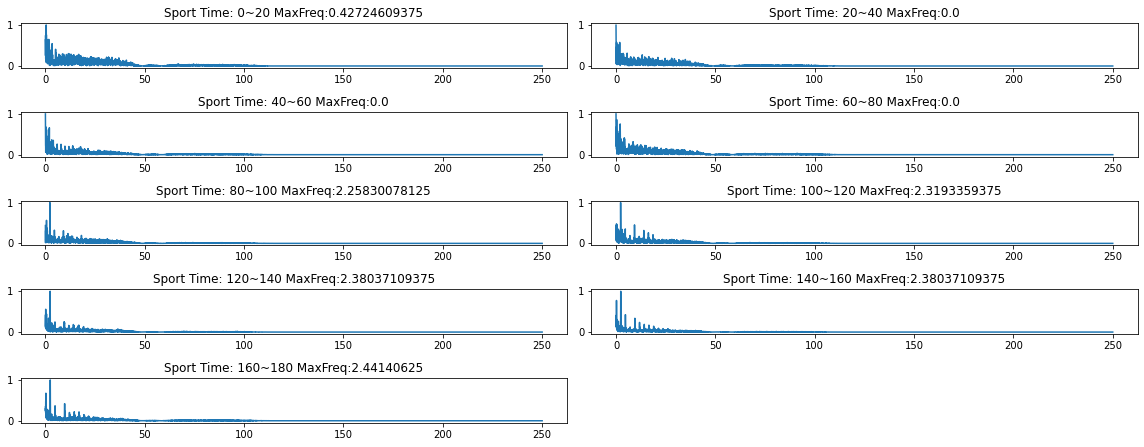

C:\Users\xiang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
C:\Users\xiang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
C:\Users\xiang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
C:\Users\xiang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-inte

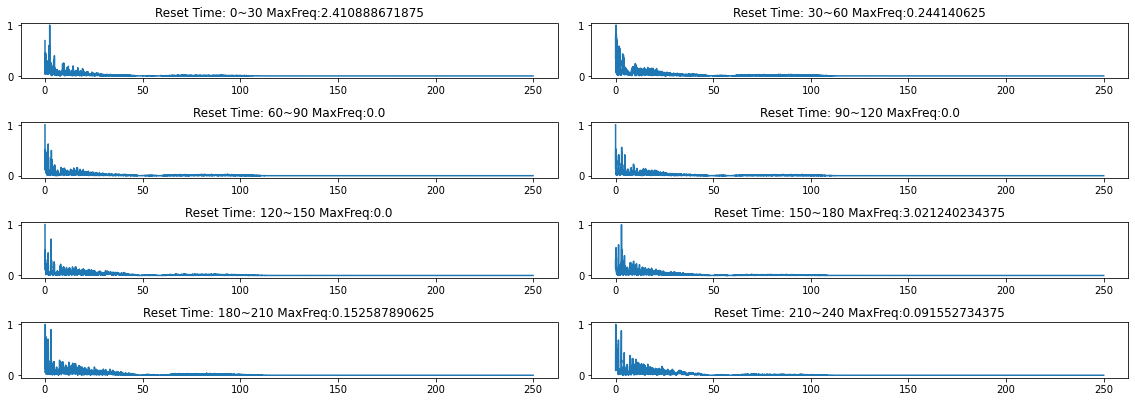

In [44]:
split_sport = [sport_data[(20*i)*500:(20*(i+1))*500] for i in range(180//20)]
plt.figure(figsize=(16,11))
minmax = MinMaxScaler()
for i in range(len(split_sport)):
    plt.subplot('92{}'.format(i+1))
    Fre, FFT_y1 = fft_freq(split_sport[i])
    plt.plot(Fre, preprocessing.minmax_scale(FFT_y1 ))
    plt.title('Sport Time: {}~{} MaxFreq:{}'.format(20*i,20*(i+1) ,FFT_y1.argmax()/32.768))
plt.tight_layout()
plt.show()

split_reset = [reset_data[(30*i)*500:(30*(i+1))*500] for i in range(240//30)]
plt.figure(figsize=(16,11))
for i in range(len(split_reset)):
    plt.subplot('82{}'.format(i+1))
    Fre, FFT_y1 = fft_freq(reset_sport[i])
    plt.plot(Fre, preprocessing.minmax_scale(FFT_y1 ))
    plt.title('Reset Time: {}~{} MaxFreq:{}'.format(30*i,30*(i+1) ,FFT_y1.argmax()/32.768))
plt.tight_layout()
